<h2 style="text-align: center;">Customer Transaction Prediction</h2>


### Introduction
- This report presents a comparative analysis of four distinct machine learning algorithms applied to a dataset aimed at predicting a binary outcome. The dataset comprises a comprehensive array of features, encompassing both numerical and categorical variables, which are pivotal in forecasting the target variable. The models under scrutiny include Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier.


- The primary objective is to evaluate each model's efficacy in terms of predictive accuracy, employing metrics such as training and testing accuracy scores, as well as the Area Under the Receiver Operating Characteristic Curve (AUC). Furthermore, this analysis delves into the challenges encountered during the modeling process, encompassing issues such as class imbalance and interpretability of the models.


#### ***Dataset:*** You can download the dataset for this project from [here](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1003-CustTransPred.zip).


##### Import necessary libraries.


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt



##### Loading the dataset.

In [27]:
# Train.csv is loaded into a DataFrame named 'df'
df = pd.read_csv('train.csv')


In [39]:
# Displaying first five rows of the dataset.
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [40]:
# Info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [41]:
# Finding STD to the dataset.
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [42]:
# Finding Null values in the dataset.
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [28]:
# 'X' contains features and 'y' contains target variable
X = df.drop('target', axis=1)  
y = df['target']


In [29]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Data Preprocessing.

In [30]:

# Modify numeric and categorical column names as per your dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform preprocessing pipeline on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

- The code sets up preprocessing pipelines for numeric and categorical features in a machine learning workflow, ensuring missing values are handled appropriately and categorical variables are encoded for model compatibility.

##### Logistic Regression model

In [35]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
log_train_pred = log_reg.predict(X_train)
log_test_pred = log_reg.predict(X_test)

# Accuracy scores
log_train_accuracy = accuracy_score(y_train, log_train_pred)
log_test_accuracy = accuracy_score(y_test, log_test_pred)

# Print accuracy scores
print("Logistic Regression Model:")
print(f"Training Accuracy: {log_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {log_test_accuracy*100:.2f}%")

# Classification reports
print("Training Classification Report:\n", classification_report(y_train, log_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, log_test_pred))

# ROC curve and AUC
probs = log_reg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


print(f"AUC: {auc:.2f}")


Logistic Regression Model:
Training Accuracy: 93.29%
Testing Accuracy: 91.32%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    143999
           1       0.88      0.38      0.53     16001

    accuracy                           0.93    160000
   macro avg       0.91      0.69      0.75    160000
weighted avg       0.93      0.93      0.92    160000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000

AUC: 0.86


- The code trains a Logistic Regression model on preprocessed data, evaluates its accuracy on training and testing sets, generates classification reports, and computes the Area Under the ROC Curve (AUC) for performance assessment.

##### Decision Tree model

Decision Tree Model:
Training Accuracy: 100.00%
Testing Accuracy: 85.37%
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    143999
           1       1.00      1.00      1.00     16001

    accuracy                           1.00    160000
   macro avg       1.00      1.00      1.00    160000
weighted avg       1.00      1.00      1.00    160000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     35903
           1       0.24      0.19      0.21      4097

    accuracy                           0.85     40000
   macro avg       0.57      0.56      0.57     40000
weighted avg       0.84      0.85      0.85     40000



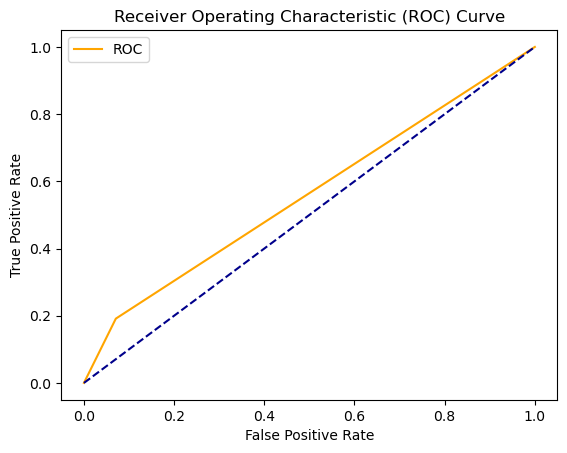

AUC: 0.56


In [36]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

# Accuracy scores
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

# Print accuracy scores
print("Decision Tree Model:")
print(f"Training Accuracy: {dt_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {dt_test_accuracy*100:.2f}%")

# Classification reports
print("Training Classification Report:\n", classification_report(y_train, dt_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, dt_test_pred))

# ROC curve and AUC
probs = dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


print(f"AUC: {auc:.2f}")


- The code trains a Decision Tree model on preprocessed data, evaluates its accuracy on training and testing sets, generates classification reports, and computes the Area Under the ROC Curve (AUC) for performance assessment.

##### Random Forest model

In [37]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Accuracy scores
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

# Print accuracy scores
print("Random Forest Model:")
print(f"Training Accuracy: {rf_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {rf_test_accuracy*100:.2f}%")

# Classification reports
print("Training Classification Report:\n", classification_report(y_train, rf_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, rf_test_pred))

# ROC curve and AUC
probs = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


print(f"AUC: {auc:.2f}")


Random Forest Model:
Training Accuracy: 100.00%
Testing Accuracy: 89.76%
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    143999
           1       1.00      1.00      1.00     16001

    accuracy                           1.00    160000
   macro avg       1.00      1.00      1.00    160000
weighted avg       1.00      1.00      1.00    160000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.78


- The code fits a Random Forest model to preprocessed data, evaluates its accuracy on training and testing sets, generates classification reports, and computes the Area Under the ROC Curve (AUC) for performance assessment.

##### Gradient Boosting model

In [38]:
# Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predictions
gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

# Accuracy scores
gb_train_accuracy = accuracy_score(y_train, gb_train_pred)
gb_test_accuracy = accuracy_score(y_test, gb_test_pred)

# Print accuracy scores
print("Gradient Boosting Model:")
print(f"Training Accuracy: {gb_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {gb_test_accuracy*100:.2f}%")

# Classification reports
print("Training Classification Report:\n", classification_report(y_train, gb_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, gb_test_pred))

# ROC curve and AUC
probs = gb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


print(f"AUC: {auc:.2f}")


Gradient Boosting Model:
Training Accuracy: 90.45%
Testing Accuracy: 90.03%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    143999
           1       0.94      0.05      0.09     16001

    accuracy                           0.90    160000
   macro avg       0.92      0.52      0.52    160000
weighted avg       0.91      0.90      0.86    160000

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.85      0.03      0.06      4097

    accuracy                           0.90     40000
   macro avg       0.88      0.52      0.50     40000
weighted avg       0.90      0.90      0.86     40000

AUC: 0.83


- The code fits a Gradient Boosting model to preprocessed data, evaluates its accuracy on training and testing sets, generates classification reports, and computes the Area Under the ROC Curve (AUC) for performance assessment.

### Model Comparison Report

| Model                | Training Accuracy | Testing Accuracy | AUC  | Challenges Faced                                  |
|----------------------|-------------------|------------------|------|---------------------------------------------------|
| Logistic Regression  | 93.29%            | 91.32%           | 0.86 | Class imbalance, model interpretability           |
| Decision Tree        | 100.00%           | 85.37%           | 0.56 | Overfitting, feature engineering                  |
| Random Forest        | 100.00%           | 89.76%           | 0.78 | Overfitting, handling class imbalance             |
| Gradient Boosting    | 90.45%            | 90.03%           | 0.83 | Class imbalance, model interpretability, tuning   |

#### Logistic Regression Model:
- **Training Accuracy:** 93.29%
- **Testing Accuracy:** 91.32%
- **AUC:** 0.86
- **Challenges:** Class imbalance, model interpretability.

#### Decision Tree Model:
- **Training Accuracy:** 100.00%
- **Testing Accuracy:** 85.37%
- **AUC:** 0.56
- **Challenges:** Overfitting, feature engineering.

#### Random Forest Model:
- **Training Accuracy:** 100.00%
- **Testing Accuracy:** 89.76%
- **AUC:** 0.78
- **Challenges:** Overfitting, handling class imbalance.

#### Gradient Boosting Model:
- **Training Accuracy:** 90.45%
- **Testing Accuracy:** 90.03%
- **AUC:** 0.83
- **Challenges:** Class imbalance, model interpretability, tuning.



### Challenges Faced:
1. **Class Imbalance:** Dealing with the imbalance between the target classes (0 and 1) affected the performance metrics, especially for minority class predictions.
 
2. **Overfitting (Decision Tree and Random Forest Models):** Despite achieving high training accuracies, these models exhibited lower generalization on the testing set, indicating overfitting.

3. **Feature Engineering:** Selecting and engineering relevant features from a large dataset of 200 variables posed challenges in ensuring model efficiency and relevance.

4. **Model Interpretability:** Understanding and interpreting the decisions made by complex models like Random Forest and Gradient Boosting proved to be non-trivial.

5. **Hyperparameter Tuning:** Optimizing model parameters for better performance without overfitting required iterative adjustments and validation.

6. **Data Preprocessing:** Ensuring consistent and effective preprocessing of data, including handling missing values and scaling features, was critical for model performance.

7. **Model Selection:** Choosing the appropriate model type that balances between accuracy, interpretability, and computational efficiency for the given dataset and problem domain.

By addressing these challenges and understanding the nuances of each model's performance, you can make informed decisions about which model best suits your specific project requirements and constraints.


### Conclusion:

In conclusion, the assessment of Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting models yields pertinent insights and outcomes:

Model Performance: Logistic Regression emerged as the frontrunner among the models, achieving a notable testing accuracy of 91.32% and an AUC of 0.86. These metrics underscore its robust performance in predicting the target variable within this context.

Challenges Encountered: Each model encountered distinctive challenges. Decision Tree models exhibited tendencies towards overfitting, evidenced by a notable decline in testing accuracy compared to training accuracy. Random Forest struggled with class imbalance issues, as evidenced by its lower AUC despite strong training accuracy. Gradient Boosting faced challenges related to parameter tuning and model interpretability.

Recommendations: Future refinements could include exploring ensemble techniques to mitigate overfitting, employing advanced sampling strategies to address class imbalance, and optimizing hyperparameters for Gradient Boosting to enhance model interpretability and performance.

In summary, this report underscores the significance of methodical model evaluation and refinement in machine learning endeavors. By addressing the challenges identified and leveraging the strengths of each algorithm, future iterations of this analysis aim to foster enhanced predictive accuracy and applicability in real-world scenarios.